# Estimating Turnover in Retail Trade

### Capstone Project by Christian Furger 

## Machine Learning - Ridge Regression

In this notebook, a Ridge regressor is tuned. As a baseline to evaluate the model, turnover one year before is used.
The regressor is tuned once with a dataset ending 2019 (before the coronavirus pandemic) and once with data up until 2020. At the end of this notebook, a quick comparison of the ridge models and the baseline is done. In a final notebook (3.6), the different models are compared with each other.

In [1]:
# Import statements
import os
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data Preparation <a name="1"></a>

### 1.1 Import Data <a name="1.1"></a>

In [2]:
# Import datasets to compare the predictions
df2020_pred = pd.read_csv('df2020_pred.csv', index_col = ('OID', 'Date'), dtype = {'Stratum_Noga' : object, 'Noga_Enterprise' : object, 'Hist_Limit' : object})
df2019_pred = pd.read_csv('df2019_pred.csv', index_col = ('OID', 'Date'), dtype = {'Stratum_Noga' : object, 'Noga_Enterprise' : object, 'Hist_Limit' : object})

print('df2020_pred:', df2020_pred.shape)
print('df2019_pred:', df2019_pred.shape)

df2020_pred: (43180, 24)
df2019_pred: (37858, 24)


In [3]:
# Load the npz files 2020
with np.load('train_data_2020.npz', allow_pickle=False) as train_2020:
    train_data_2020 = dict(train_2020.items())
with np.load('train_data_rescaled_2020.npz', allow_pickle=False) as train_rescaled_2020:
    train_data_rescaled_2020 = dict(train_rescaled_2020.items())
with np.load('test_data_2020.npz', allow_pickle=False) as test_2020:
    test_data_2020 = dict(test_2020.items())
with np.load('test_data_rescaled_2020.npz', allow_pickle=False) as test_rescaled_2020:
    test_data_rescaled_2020 = dict(test_rescaled_2020.items())
    
# Create X/y arrays
X2020_tr = train_data_2020['features']
X2020_tr_rescaled = train_data_rescaled_2020['features']
y2020_tr = train_data_2020['targets']

X2020_te = test_data_2020['features']
X2020_te_rescaled = test_data_rescaled_2020['features']
y2020_te = test_data_2020['targets']

print('X2020_tr:', X2020_tr.shape)
print('X2020_tr_rescaled:', X2020_tr_rescaled.shape)
print('y2020_tr:', y2020_tr.shape)

print('X2020_te:', X2020_te.shape)
print('X2020_te_rescaled:', X2020_te_rescaled.shape)
print('y2020_te:', y2020_te.shape)

X2020_tr: (100753, 167)
X2020_tr_rescaled: (100753, 167)
y2020_tr: (100753,)
X2020_te: (43180, 167)
X2020_te_rescaled: (43180, 167)
y2020_te: (43180,)


In [4]:
# Load the npz files 2019
with np.load('train_data_2019.npz', allow_pickle=False) as train_2019:
    train_data_2019 = dict(train_2019.items())
with np.load('train_data_rescaled_2019.npz', allow_pickle=False) as train_rescaled_2019:
    train_data_rescaled_2019 = dict(train_rescaled_2019.items())
with np.load('test_data_2019.npz', allow_pickle=False) as test_2019:
    test_data_2019 = dict(test_2019.items())
with np.load('test_data_rescaled_2019.npz', allow_pickle=False) as test_rescaled_2019:
    test_data_rescaled_2019 = dict(test_rescaled_2019.items())
    
# Create X/y arrays
X2019_tr = train_data_2019['features']
X2019_tr_rescaled = train_data_rescaled_2019['features']
y2019_tr = train_data_2019['targets']

X2019_te = test_data_2019['features']
X2019_te_rescaled = test_data_rescaled_2019['features']
y2019_te = test_data_2019['targets']

print('X2019_tr:', X2019_tr.shape)
print('X2019_tr_rescaled:', X2019_tr_rescaled.shape)
print('y2019_tr:', y2019_tr.shape)

print('X2019_te:', X2019_te.shape)
print('X2019_te_rescaled:', X2019_te_rescaled.shape)
print('y2019_te:', y2019_te.shape)

X2019_tr: (88334, 165)
X2019_tr_rescaled: (88334, 165)
y2019_tr: (88334,)
X2019_te: (37858, 165)
X2019_te_rescaled: (37858, 165)
y2019_te: (37858,)


### 1.2 Create Baseline <a name="1.2"></a>

In [5]:
# Compare models with mean absolute error (MAE), mean squared error (MSE) and root mean squared error (RMSE)
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE

def RMSE(y, y_pred):
    return np.sqrt(np.mean(np.square(y-y_pred)))

In [6]:
# Baseline 2020: turnover one year before
# Load the npz files
with np.load('y2020_te_baseline.npz', allow_pickle=False) as baseline_2020:
    y2020_baseline = dict(baseline_2020.items())

y2020_te_baseline = y2020_baseline['targets']    

mae_baseline2020 = MAE(np.expm1(y2020_te), np.expm1(y2020_te_baseline))
rmse_baseline2020=RMSE(np.expm1(y2020_te), np.expm1(y2020_te_baseline))
mse_baseline2020 = MSE(y2020_te, y2020_te_baseline)

print('Baseline (2020) MAE (in CHF): {:.3f}'.format(mae_baseline2020))
print('Baseline (2020) RMSE: {:.3f}'.format(rmse_baseline2020))
print('Baseline (2020) MSE: {:.3f}'.format(mse_baseline2020))

Baseline (2020) MAE (in CHF): 3145.044
Baseline (2020) RMSE: 40103.069
Baseline (2020) MSE: 15.322


In [7]:
# Baseline 2019: turnover one year before
# Load the npz files
with np.load('y2019_te_baseline.npz', allow_pickle=False) as baseline_2019:
    y2019_baseline = dict(baseline_2019.items())

y2019_te_baseline = y2019_baseline['targets']    

mae_baseline2019 = MAE(np.expm1(y2019_te), np.expm1(y2019_te_baseline))
rmse_baseline2019=RMSE(np.expm1(y2019_te), np.expm1(y2019_te_baseline))
mse_baseline2019 = MSE(y2019_te, y2019_te_baseline)

print('Baseline (2019) MAE (in CHF): {:.3f}'.format(mae_baseline2019))
print('Baseline (2019) RMSE: {:.3f}'.format(rmse_baseline2019))
print('Baseline (2019) MSE: {:.3f}'.format(mse_baseline2019))

Baseline (2019) MAE (in CHF): 2956.581
Baseline (2019) RMSE: 38434.627
Baseline (2019) MSE: 15.130


In [8]:
# Function to plot predicted vs real values
def plot_prediction(model,df,year,title):

    size=['small','medium','large']
    colors = ['red', 'green', 'blue']

    fig, axes = plt.subplots(1,len(size),figsize=(5*len(size),5))
    fig.suptitle(title+' ('+str(year)+'): Scatter plots of real vs predicted turnover (log)',fontsize=20)

    for i in range(0,3):
        size_df=df[df['Stratum_Size']==i+1]
        axes[i].scatter(np.log1p(size_df['TOV']), np.log1p(size_df['TOV_'+model]), label='', color=colors[i], s=1)
        axes[i].plot([0,14],[0,14], color='black', linewidth=1)

        #obtain a (slope) and b(intercept) of linear regression line
        a, b = np.polyfit(np.log1p(size_df['TOV']), np.log1p(size_df['TOV_'+model]), 1)
        
        # Generate a hundred values between 0 and 14
        x_values = np.linspace(0, 14, num=100)
        # Compute the associate y values
        y_values = a*x_values + b
        
        #add linear regression line to scatterplot          
        axes[i].plot(x_values, y_values, color=colors[i], label='slope: {:.2f}'.format(a))
           
        axes[i].set_title(size[i])
        axes[i].set_xlabel('real')
        axes[i].set_ylabel('predicted')
        axes[i].legend()

    plt.show()

## 2. Model fitting <a name="2"></a>

In [9]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from pprint import pprint

# Create a ridge pipeline with PCA
ridge1_estimator = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('ridge', Ridge())
])

# Create a ridge pipeline without PCA
ridge2_estimator = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# Parameter list
# Number of components for PCA
n_components = [1,2,5,10,20,50,100]
# Alpha for Ridge Regression
alpha = np.logspace(-4, 4, num=9)


# Create the grids
grid1 = {'pca__n_components': n_components,
        'ridge__alpha': alpha}
print('Grid1 with PCA:')
pprint(grid1)

print('Grid2 without PCA:')
grid2 = {'ridge__alpha': alpha}
pprint(grid2)

Grid1 with PCA:
{'pca__n_components': [1, 2, 5, 10, 20, 50, 100],
 'ridge__alpha': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04])}
Grid2 without PCA:
{'ridge__alpha': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04])}


### 2.1 Dataset ending 2020 <a name="2.1"></a>

First, we tune a Ridge Estimator with PCA.

In [10]:
# Finetune first Ridge Estimator (with PCA) with grid search
ridge_grid1_cv2020 = GridSearchCV(ridge1_estimator, grid1, cv=5, refit=True, return_train_score=True, verbose=2, n_jobs = -1)

# Fit Ridge estimator
ridge_grid1_cv2020.fit(X2020_tr, y2020_tr)

# Collect results in a DataFrame
ridge_grid1_2020 = pd.DataFrame({
    'comp': ridge_grid1_cv2020.cv_results_['param_pca__n_components'],
    'alpha': ridge_grid1_cv2020.cv_results_['param_ridge__alpha'],
    'mean_tr': ridge_grid1_cv2020.cv_results_['mean_train_score'],
    'mean_te': ridge_grid1_cv2020.cv_results_['mean_test_score'],
    'std_te': ridge_grid1_cv2020.cv_results_['std_test_score']
})


# Ten best combinations according to the mean "test" score
# i.e. the mean score on the 5 validation folds
ridge_grid1_2020.sort_values(by='mean_te', ascending=False).head(10)

Fitting 5 folds for each of 63 candidates, totalling 315 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 315 out of 315 | elapsed:  9.0min finished


,comp,alpha,mean_tr,mean_te,std_te
61,100,1000,0.865556,0.865215,0.002913
56,100,0.01,0.865363,0.864975,0.002707
57,100,0.1,0.865229,0.864868,0.002832
54,100,0.0001,0.864945,0.864645,0.002720
55,100,0.001,0.865131,0.864543,0.003217
58,100,1,0.865016,0.864422,0.002195
59,100,10,0.864877,0.864377,0.002295
60,100,100,0.864623,0.864301,0.003024
62,100,10000,0.864440,0.863945,0.002650
50,50,10,0.858123,0.857753,0.002107


Then, we tune a second Ridge Estimator without PCA.

In [11]:
# Finetuning second Ridge Estimator (without PCA) with grid search
ridge_grid2_cv2020 = GridSearchCV(ridge2_estimator, grid2, cv=5, refit=True, return_train_score=True, verbose=2, n_jobs = -1)

# Fit Ridge estimator
ridge_grid2_cv2020.fit(X2020_tr, y2020_tr)

# Collect results in a DataFrame
ridge_grid2_2020 = pd.DataFrame({
    'alpha': ridge_grid2_cv2020.cv_results_['param_ridge__alpha'],
    'mean_tr': ridge_grid2_cv2020.cv_results_['mean_train_score'],
    'mean_te': ridge_grid2_cv2020.cv_results_['mean_test_score'],
    'std_te': ridge_grid2_cv2020.cv_results_['std_test_score']
})


# Ten best combinations according to the mean "test" score
# i.e. the mean score on the 5 validation folds
ridge_grid2_2020.sort_values(by='mean_te', ascending=False).head(10)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   19.0s finished


,alpha,mean_tr,mean_te,std_te
6,100,0.939556,0.939293,0.002282
5,10,0.939561,0.939293,0.002298
4,1,0.939561,0.939292,0.002299
3,0.1,0.939561,0.939292,0.002300
2,0.01,0.939561,0.939292,0.002300
1,0.001,0.939561,0.939292,0.002300
0,0.0001,0.939561,0.939292,0.002300
7,1000,0.939295,0.939053,0.002171
8,10000,0.931744,0.931544,0.001996


The estimator without PCA gives better results (mean test score of 93.9% vs 86.5%) and is therefore chosen. The best alpha is 100.

In [12]:
# Show best estimator
ridge_grid2_cv2020.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('ridge', Ridge(alpha=100.0))])

Let's fit a ridge regression, calculate the predictions for the test set and calculate the model accuracy.

In [13]:
# Create and fit ridge regression
ridge2020 = ridge_grid2_cv2020.best_estimator_
ridge2020.fit(X2020_tr, y2020_tr)

# Calculate predictions
y_pred_ridge2020 = ridge2020.predict(X2020_te) # Predictions for test data

# Calculate model accuracy
mae_ridge2020 = MAE(np.expm1(y2020_te), np.expm1(y_pred_ridge2020))
rmse_ridge2020=RMSE(np.expm1(y2020_te), np.expm1(y_pred_ridge2020))
mse_ridge2020 = MSE(y2020_te, y_pred_ridge2020)

# Export model accuracy
ridge2020=pd.DataFrame([['Ridge', '{:.3f}'.format(mae_ridge2020), '{:.3f}'.format(rmse_ridge2020), '{:.3f}'.format(mse_ridge2020)]],
                 columns=['Model', 'MAE', 'RMSE', 'MSE'])
ridge2020.to_csv("ridge2020.csv", encoding='utf-8', index=False)
ridge2020.head()

,Model,MAE,RMSE,MSE
0,Ridge,380.454,5274.627,0.203


In [14]:
# Add prediction to dataset
df2020_pred['TOV_ridge'] = np.expm1(y_pred_ridge2020).tolist()
df2020_pred.head()

,,TOV,Year,Month,KT,Lang,Stratum_Noga,Sample_ID,Noga_Enterprise,Hist_Limit,Channel_ID,...,Empl_Enterprise,FTE_Enterprise,Empl_RT,Profiling,Group,Split,Sample_1,Sample_2,Lockdown,TOV_ridge
OID,Date,,,,,,,,,,,,,,,,,,,,,
5450606,2018-02,384,2018,2,FR,1,476,M,4764,201401,2.0,...,23,19.126886,23.0,0,0,0,1,1,0.0,420.640125
1531866,2018-12,45,2018,12,BE,1,477,Q2,4779,201401,1.0,...,3,2.350000,3.0,0,0,0,1,0,0.0,38.050396
1836440,2016-03,2,2016,3,ZH,1,476,Q1,4763,201401,1.0,...,3,2.300000,3.0,0,0,0,1,0,0.0,3.814965
6890730,2015-02,436,2015,2,JU,2,477,Q1,4773,201401,1.0,...,17,12.300000,17.0,0,0,0,1,0,0.0,373.506584
1847522,2020-09,44,2020,9,VS,1,476,Q3,4764,201801,1.0,...,6,4.840000,6.0,0,0,0,0,1,0.0,43.637700


### 2.2 Dataset ending 2019 <a name="2.2"></a>

Also for this dataset, we first tune the Ridge Estimator with PCA.

In [15]:
# Finetune first Ridge Estimator (with PCA) with grid search
ridge_grid1_cv2019 = GridSearchCV(ridge1_estimator, grid1, cv=5, refit=True, return_train_score=True, verbose=2, n_jobs = -1)

# Fit Ridge estimator
ridge_grid1_cv2019.fit(X2019_tr, y2019_tr)

# Collect results in a DataFrame
ridge_grid1_2019 = pd.DataFrame({
    'comp': ridge_grid1_cv2019.cv_results_['param_pca__n_components'],
    'alpha': ridge_grid1_cv2019.cv_results_['param_ridge__alpha'],
    'mean_tr': ridge_grid1_cv2019.cv_results_['mean_train_score'],
    'mean_te': ridge_grid1_cv2019.cv_results_['mean_test_score'],
    'std_te': ridge_grid1_cv2019.cv_results_['std_test_score']
})


# Ten best combinations according to the mean "test" score
# i.e. the mean score on the 5 validation folds
ridge_grid1_2019.sort_values(by='mean_te', ascending=False).head(10)

Fitting 5 folds for each of 63 candidates, totalling 315 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 315 out of 315 | elapsed:  4.5min finished


,comp,alpha,mean_tr,mean_te,std_te
54,100,0.0001,0.879121,0.878649,0.004666
60,100,100,0.878931,0.878575,0.004884
61,100,1000,0.878998,0.878554,0.004256
57,100,0.1,0.878586,0.878450,0.004409
55,100,0.001,0.878753,0.878438,0.004526
59,100,10,0.878828,0.878377,0.004317
58,100,1,0.878634,0.878162,0.004678
56,100,0.01,0.878263,0.877753,0.004270
62,100,10000,0.877376,0.877141,0.004912
52,50,1000,0.871283,0.870891,0.005149


And then without PCA

In [16]:
# Finetuning second Ridge Estimator (without PCA) with grid search
ridge_grid2_cv2019 = GridSearchCV(ridge2_estimator, grid2, cv=5, refit=True, return_train_score=True, verbose=2, n_jobs = -1)

# Fit Ridge estimator
ridge_grid2_cv2019.fit(X2019_tr, y2019_tr)

# Collect results in a DataFrame
ridge_grid2_2019 = pd.DataFrame({
    'alpha': ridge_grid2_cv2019.cv_results_['param_ridge__alpha'],
    'mean_tr': ridge_grid2_cv2019.cv_results_['mean_train_score'],
    'mean_te': ridge_grid2_cv2019.cv_results_['mean_test_score'],
    'std_te': ridge_grid2_cv2019.cv_results_['std_test_score']
})


# Ten best combinations according to the mean "test" score
# i.e. the mean score on the 5 validation folds
ridge_grid2_2019.sort_values(by='mean_te', ascending=False).head(10)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   15.1s finished


,alpha,mean_tr,mean_te,std_te
5,10,0.953071,0.952869,0.004504
4,1,0.953071,0.952869,0.004506
3,0.1,0.953071,0.952869,0.004506
2,0.01,0.953071,0.952869,0.004506
1,0.001,0.953071,0.952869,0.004506
0,0.0001,0.953071,0.952869,0.004506
6,100,0.953066,0.952866,0.004482
7,1000,0.952742,0.952550,0.004307
8,10000,0.944043,0.943862,0.003930


The estimator without PCA gives better results (mean test score of 95.3% vs 87.9%) and is therefore chosen. The best alpha is 10.

In [17]:
# Show best estimator
ridge_grid2_cv2019.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('ridge', Ridge(alpha=10.0))])

Let's fit a ridge regression, calculate the predictions for the test set and calculate the model accuracy.

In [18]:
# Create and fit ridge regression
ridge2019 = ridge_grid2_cv2019.best_estimator_
ridge2019.fit(X2019_tr, y2019_tr)

# Calculate predictions
y_pred_ridge2019 = ridge2019.predict(X2019_te) # Predictions for test data

# Calculate model accuracy
mae_ridge2019 = MAE(np.expm1(y2019_te), np.expm1(y_pred_ridge2019))
rmse_ridge2019=RMSE(np.expm1(y2019_te), np.expm1(y_pred_ridge2019))
mse_ridge2019 = MSE(y2019_te, y_pred_ridge2019)

# Export model accuracy
ridge2019=pd.DataFrame([['Ridge', '{:.3f}'.format(mae_ridge2019), '{:.3f}'.format(rmse_ridge2019), '{:.3f}'.format(mse_ridge2019)]],
                 columns=['Model', 'MAE', 'RMSE', 'MSE'])
ridge2019.to_csv("ridge2019.csv", encoding='utf-8', index=False)
ridge2019.head()

,Model,MAE,RMSE,MSE
0,Ridge,256.214,2993.797,0.150


In [19]:
# Add prediction to dataset
df2019_pred['TOV_ridge'] = np.expm1(y_pred_ridge2019).tolist()
df2019_pred.head()

,,TOV,Year,Month,KT,Lang,Stratum_Noga,Sample_ID,Noga_Enterprise,Hist_Limit,Channel_ID,...,Empl_Enterprise,FTE_Enterprise,Empl_RT,Profiling,Group,Split,Sample_1,Sample_2,Lockdown,TOV_ridge
OID,Date,,,,,,,,,,,,,,,,,,,,,
3145896,2015-08,908,2015,8,GE,2,473,Q2,4730,201401,2.0,...,9,7.61,9.0,0,0,0,1,0,0.0,952.142145
2705074,2019-11,32,2019,11,TI,3,475,Q1,4759,201801,5.0,...,3,2.25,3.0,0,0,0,0,1,0.0,31.349906
6980772,2015-02,69,2015,2,BE,1,477,M,4778,201401,2.0,...,6,4.61,6.0,0,0,0,1,0,0.0,51.542316
5107348,2017-12,116,2017,12,AG,1,477,Q1,4775,201401,1.0,...,9,5.93,9.0,0,0,0,1,0,0.0,111.896352
1298468,2018-11,28,2018,11,VS,2,476,Q3,4764,201401,2.0,...,4,3.41,4.0,0,0,0,1,0,0.0,49.471427


### 2.3 Model comparison <a name="2.3"></a>

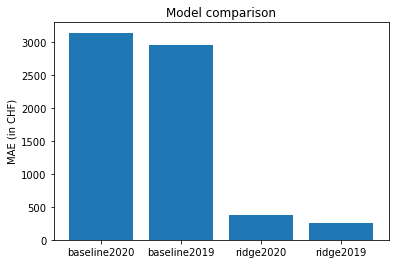

In [20]:
# Comparison
mae_values = [mae_baseline2020, mae_baseline2019, mae_ridge2020, mae_ridge2019]
titles = ['baseline2020', 'baseline2019', 'ridge2020', 'ridge2019']

xcor = np.arange(len(mae_values))
plt.bar(xcor, mae_values)
plt.xticks(xcor, titles)
plt.title('Model comparison')
plt.ylabel('MAE (in CHF)')
plt.show()

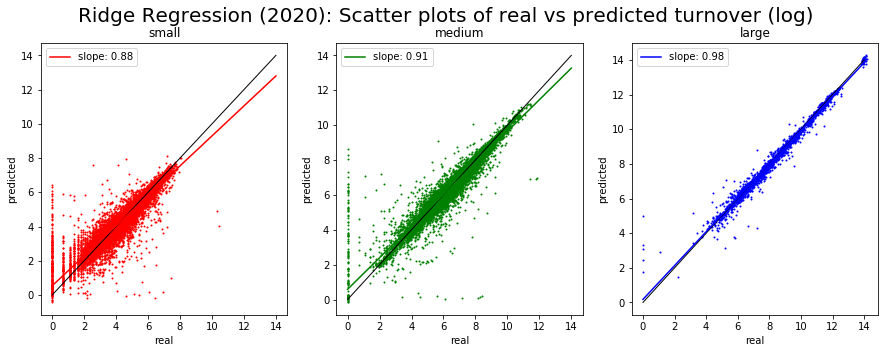

In [21]:
plot_prediction('ridge',df2020_pred,2020,'Ridge Regression')

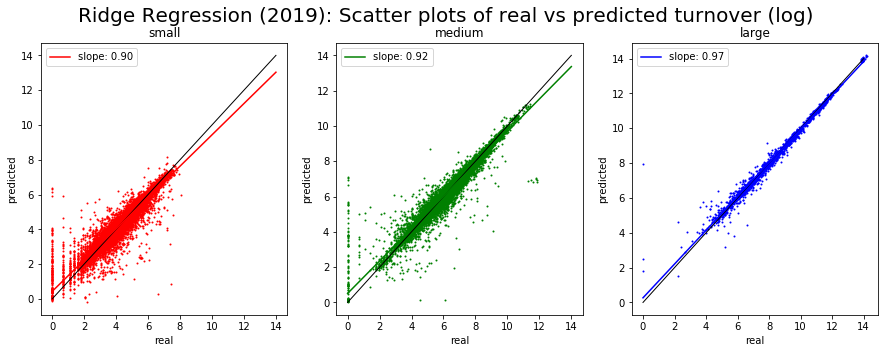

In [22]:
plot_prediction('ridge',df2019_pred,2019,'Ridge Regression')

In [23]:
# Exporting datasets with predictions
df2020_pred.to_csv("df2020_pred.csv", encoding='utf-8', index=True)
df2019_pred.to_csv("df2019_pred.csv", encoding='utf-8', index=True)

The ridge regression seems to give quite good results, especially for the large enterprises. The model seems to be less able to predict turnover of 0. This might be due to the log1p transformation. The model with data only until 2019 gives only slightly better results than the model using all the data, so the model seems to capture well the effects of the coronavirus pandemic. 